In [85]:
from matplotlib import pyplot as plt
import pandas as pd
from describe import describe, ft_min, ft_max, ft_count, ft_dropna

### 1. Describe dataset

In [86]:
df = pd.read_csv('datasets/dataset_train.csv')
df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [87]:
features = df[["Arithmancy", "Astronomy", "Herbology", "Defense Against the Dark Arts", "Divination", "Muggle Studies", "Ancient Runes", "History of Magic", "Transfiguration", "Potions", "Care of Magical Creatures", "Charms", "Flying"]]
labels = ["Feature " + str(i+1) for i in range(len(features.columns))] 
features.columns = labels
features

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [88]:
features.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [112]:
describe(features)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.00000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.15391,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16674.479577,520.132330,5.218016,5.211132,4.15397,486.189433,106.251202,4.424353,44.111025,3.146852,0.971146,8.780895,97.601087
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.72700,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.09900,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.62400,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.66700,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.03200,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


### 2. Prepare the data

Add classes

In [127]:
dataset = pd.concat([df["Hogwarts House"], features], axis=1)
# print(dataset)

def set_classes(df):
    houses = {"Ravenclaw": 0, "Slytherin": 1, "Gryffindor": 2, "Hufflepuff": 3}
    for i in range(len(df)):
        df.loc[i, "Hogwarts House"] = houses[df.loc[i, "Hogwarts House"]]
    return df
dataset = set_classes(dataset)
dataset


,Hogwarts House,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13
0,0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,0,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,2,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,2,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,2,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,3,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


- Remove one of the feature that correlate with each other (Astronomy - feature 2 and Defense Against the Dark Arts - feature 4)	
- Remove feature that has a homogeneous score distribution between all classes (Care of Magical Creatures - feature 11) and may be feature with almost homogeneous score (Arithmancy - feature 1)

In [128]:
dataset.drop(columns = ["Feature 4", "Feature 11"], axis=1, inplace=True)
dataset

,Hogwarts House,Feature 1,Feature 2,Feature 3,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 12,Feature 13
0,0,58384.0,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,1,67239.0,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,0,23702.0,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,2,32667.0,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,2,60158.0,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,49009.0,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83
1596,1,63296.0,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80
1597,2,63905.0,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47
1598,3,82713.0,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81


Remove NaN and not numeric values

In [130]:
# print(dataset)
def remove_nan(df):
    columns = dataset.shape[1]

    for index, row in df.iterrows():
        if ft_count(row.tolist()) < columns:
            df = df.drop(index, axis=0)
    return df

dataset = ft_dropna(dataset)

dataset.reset_index(drop=True, inplace=True)
dataset

# dataset = pd.concat([df["Hogwarts House"], dataset], axis=1)
# dataset = dataset.dropna(inplace=False).reset_index(drop=True)
# dataset

,Hogwarts House,Feature 1,Feature 2,Feature 3,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 12,Feature 13
0,0,58384.0,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89
1,1,67239.0,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45
2,0,23702.0,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42
3,2,32667.0,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64
4,2,60158.0,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2,49009.0,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83
1301,1,63296.0,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80
1302,2,63905.0,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47
1303,3,82713.0,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81


In [ ]:
dataset

Check duplicates

In [107]:
def find_duplicates(dataset):
    if len(dataset) != len(dataset.drop_duplicates()):
        print("There are duplicates in the dataset")
    else:
        print("There are no duplicates in the dataset")

find_duplicates(features)


There are no duplicates in the dataset


Find outliers

In [ ]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers = find_outliers(features['Feature 11'])
# outliers


In [ ]:
def plot_outliers(data):
    plt.boxplot(data)
    plt.show()

# plot_outliers(features['Feature 8'])


Normalize data using min-max scaling

In [131]:
# x_scaled = x - x_min / x_max - x_min
def normalize(lst, x):
    return (x - ft_min(lst)) / (ft_max(lst) - ft_min(lst))

In [134]:
# normalize dataset
def normalize_dataset(df):
    for column in df.columns:
        col = df[column].tolist()
        col_norm = [normalize(col, x) for x in col]
        df.loc[:, column] = col_norm
    return df


norm_dataset = normalize_dataset(dataset)
print(dataset.describe())
print(dataset)

         Feature 1    Feature 2    Feature 3    Feature 5    Feature 6  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean      0.570375     0.509608     0.558345     0.635687     0.384091   
std       0.128884     0.262823     0.253645     0.219905     0.226622   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.484141     0.241877     0.292283     0.630524     0.220317   
50%       0.566336     0.624060     0.671250     0.711712     0.292066   
75%       0.657401     0.752955     0.765971     0.769604     0.612090   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Feature 7    Feature 8    Feature 9   Feature 10   Feature 12  \
count  1305.000000  1305.000000  1305.000000  1305.000000  1305.000000   
mean      0.458794     0.562753     0.657855     0.559239     0.498269   
std       0.230697     0.217953     0.233143     0.180547     0.246480   
min       0.000000     0.000000     0

Add classes

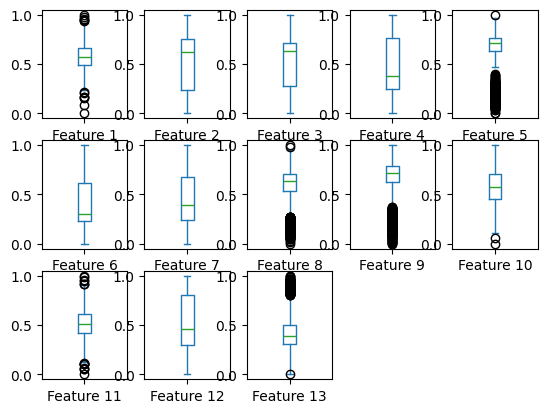

In [ ]:

# make plots for all features in one plot

def plot_all_features(data):
    data.plot(kind='box', subplots=True, layout=(3, 5), sharex=False, sharey=False)
    plt.show()

plot_all_features(features)